In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [149]:
csvpath_confirmed="COVID-19_dataset/time_series_19-covid-Confirmed.csv"
csvpath_deaths="COVID-19_dataset/time_series_19-covid-Deaths.csv"
csvpath_recovered="COVID-19_dataset/time_series_19-covid-Recovered.csv"

In [150]:
Confirmed_df1=pd.read_csv(csvpath_confirmed)
Deaths_df1=pd.read_csv(csvpath_deaths)
Recovered_df1=pd.read_csv(csvpath_recovered)

In [151]:
Confirmed_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)
Deaths_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)
Recovered_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)

Confirmed_df1=Confirmed_df1.fillna(0)
Deaths_df1=Deaths_df1.fillna(0)
Recovered_df1=Recovered_df1.fillna(0)

In [152]:
Confirmed_Italy = Confirmed_df1[Confirmed_df1['Country/Region']=='Italy']
Confirmed_Iran = Confirmed_df1[Confirmed_df1['Country/Region']=='Iran']

Deaths_Italy = Deaths_df1[Confirmed_df1['Country/Region']=='Italy']
Deaths_Iran = Deaths_df1[Confirmed_df1['Country/Region']=='Iran']

Recovered_Italy = Recovered_df1[Confirmed_df1['Country/Region']=='Italy']
Recovered_Iran = Recovered_df1[Confirmed_df1['Country/Region']=='Iran']

Recovered_Italy

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
16,Italy,0,0,0,0,0,0,0,0,0,...,276,414,523,589,622,724,724,1045,1045,1439


In [153]:
###table creation for Italy
###
###
Italy_df = pd.concat([Confirmed_Italy, Deaths_Italy], ignore_index=True)
Italy_df = pd.concat([Italy_df, Recovered_Italy], ignore_index = True)
Italy_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Italy,0,0,0,0,0,0,0,0,0,...,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660
1,Italy,0,0,0,0,0,0,0,0,0,...,107,148,197,233,366,463,631,827,827,1266
2,Italy,0,0,0,0,0,0,0,0,0,...,276,414,523,589,622,724,724,1045,1045,1439


In [154]:
Italy_df = Italy_df.rename(columns={'Country/Region':''})
new_df = pd.DataFrame({ '':['#Cummulative Confirmed Cases','#Cummulative Death Cases','#Cummulative Recovered Cases']})
Italy_df.update(new_df)
Italy_df

,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,#Cummulative Confirmed Cases,0,0,0,0,0,0,0,0,0,...,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660
1,#Cummulative Death Cases,0,0,0,0,0,0,0,0,0,...,107,148,197,233,366,463,631,827,827,1266
2,#Cummulative Recovered Cases,0,0,0,0,0,0,0,0,0,...,276,414,523,589,622,724,724,1045,1045,1439


In [155]:
#transpose to reverse row and columns and at the same time setting the index column using the 'cases' column pre-transpose
# it is necessary in order to have a callable dtype to rename the column title after reset_index
Italy_df_T = Italy_df.set_index('').T
Italy_df_T.index.name = 'Dates'
Italy_df_T =Italy_df_T.reset_index()
Italy_df_T

,Dates,#Cummulative Confirmed Cases,#Cummulative Death Cases,#Cummulative Recovered Cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
5,1/27/20,0,0,0
6,1/28/20,0,0,0
7,1/29/20,0,0,0
8,1/30/20,0,0,0
9,1/31/20,2,0,0


In [156]:
###table creation for Iran
###
###
Iran_df = pd.concat([Confirmed_Iran, Deaths_Iran], ignore_index=True)
Iran_df = pd.concat([Iran_df, Recovered_Iran], ignore_index = True)
Iran_df

Iran_df = Iran_df.rename(columns={'Country/Region':''})
new_df = pd.DataFrame({ '':['#Cummulative Confirmed Cases','#Cummulative Death Cases','#Cummulative Recovered Cases']})
Iran_df.update(new_df)
Iran_df

Iran_df_T = Iran_df.set_index('').T
Iran_df_T.index.name = 'Dates'
Iran_df_T =Iran_df_T.reset_index()
Iran_df_T

,Dates,#Cummulative Confirmed Cases,#Cummulative Death Cases,#Cummulative Recovered Cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
5,1/27/20,0,0,0
6,1/28/20,0,0,0
7,1/29/20,0,0,0
8,1/30/20,0,0,0
9,1/31/20,0,0,0


In [157]:
###equation for Italy
###
###
death_total_Italy= Italy_df_T['#Cummulative Death Cases'].max()
confirmed_total_Italy = Italy_df_T['#Cummulative Confirmed Cases'].max()
recovered_total_Italy = Italy_df_T['#Cummulative Recovered Cases'].max()

total_population_Italy = 60550075
#result of googling
days_since_outbreak_Italy = len(Italy_df_T)-len(Italy_df_T[Italy_df_T['#Cummulative Confirmed Cases']==0])
#52-9=43
                                             
percentage_death_Italy = round((death_total_Italy/confirmed_total_Italy)*100,2)

percentage_recovered_Italy = round((recovered_total_Italy/confirmed_total_Italy)*100,2)

infection_rate_Italy = round((confirmed_total_Italy/total_population_Italy)*100,5)

speed_infection_Italy = round((confirmed_total_Italy/days_since_outbreak_Italy ),1)
speed_infection_Italy 

410.7

In [158]:
###equation for Iran
###
###
death_total_Iran= Iran_df_T['#Cummulative Death Cases'].max()
confirmed_total_Iran = Iran_df_T['#Cummulative Confirmed Cases'].max()
recovered_total_Iran = Iran_df_T['#Cummulative Recovered Cases'].max()

total_population_Iran = 82913906
#result of googling
days_since_outbreak_Iran = len(Iran_df_T)-len(Iran_df_T[Iran_df_T['#Cummulative Confirmed Cases']==0])
#52-9=43
                                             
percentage_death_Iran = round((death_total_Iran/confirmed_total_Iran)*100,2)

percentage_recovered_Iran = round((recovered_total_Iran/confirmed_total_Iran)*100,2)

infection_rate_Iran = round((confirmed_total_Iran/total_population_Iran)*100,5)

speed_infection_Iran = round((confirmed_total_Iran/days_since_outbreak_Iran ),1)
speed_infection_Iran 

473.5

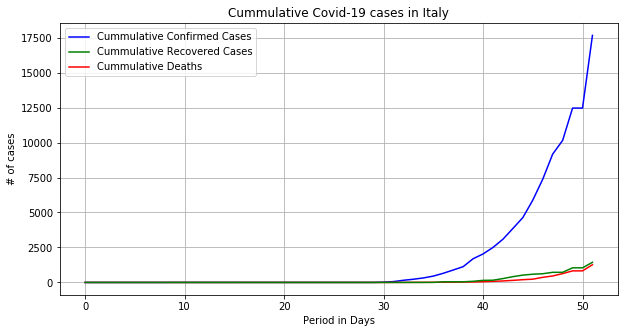

Everyday 410.7 people got infected from first confirmed case (31st Jan 2020) to 13th March 2020.
The rate at which the population got infected from first confirmed case (31st Jan 2020) to 13th March 2020 was 0.02917.
7.17% population suffered death from first confirmed case (31st Jan 2020) to 13th March 2020.
8.15% population recovered from first confirmed case (31st Jan 2020) to 13th March 2020.


In [159]:
### plot for Italy
###
###
plt.figure(figsize=(10,5))
x_axis = np.arange(0, len(Italy_df_T))

plt.title("Cummulative Covid-19 cases in Italy")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
    
confirmed_cases, = plt.plot(x_axis, Italy_df_T.loc[:,'#Cummulative Confirmed Cases'], color="blue", label="Cummulative Confirmed Cases")
death_cases, = plt.plot(x_axis, Italy_df_T.loc[:,'#Cummulative Death Cases'], color="red", label="Cummulative Deaths")
recovered_cases, = plt.plot(x_axis, Italy_df_T.loc[:,'#Cummulative Recovered Cases'], color="green", label="Cummulative Recovered Cases")

plt.legend(handles=[confirmed_cases, recovered_cases, death_cases], loc="upper left")

plt.show()


print(f"Everyday {speed_infection_Italy} people got infected from first confirmed case (31st Jan 2020) to 13th March 2020.")
print(f"The rate at which the population got infected from first confirmed case (31st Jan 2020) to 13th March 2020 was {infection_rate_Italy}.")
print(f"{percentage_death_Italy}% population suffered death from first confirmed case (31st Jan 2020) to 13th March 2020.")
print(f"{percentage_recovered_Italy}% population recovered from first confirmed case (31st Jan 2020) to 13th March 2020.")

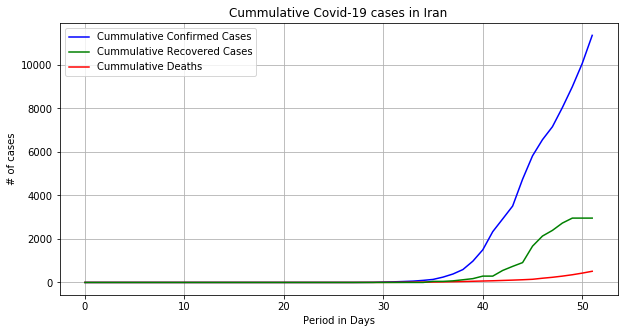

Everyday 473.5 people got infected from first confirmed case (19th Feb 2020) to 13th March 2020.
The rate at which the population got infected from first confirmed case (19th Feb 2020) to 13th March 2020 was 0.01371.
4.52% population suffered death from first confirmed case (19th Feb 2020) to 13th March 2020.
26.04% population recovered from first confirmed case (19th Feb 2020) to 13th March 2020.


In [161]:
### plot for Iran
###
###

plt.figure(figsize=(10,5))
x_axis = np.arange(0, len(Iran_df_T))

plt.title("Cummulative Covid-19 cases in Iran")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
    
confirmed_cases, = plt.plot(x_axis, Iran_df_T.loc[:,'#Cummulative Confirmed Cases'], color="blue", label="Cummulative Confirmed Cases")
death_cases, = plt.plot(x_axis, Iran_df_T.loc[:,'#Cummulative Death Cases'], color="red", label="Cummulative Deaths")
recovered_cases, = plt.plot(x_axis, Iran_df_T.loc[:,'#Cummulative Recovered Cases'], color="green", label="Cummulative Recovered Cases")

plt.legend(handles=[confirmed_cases, recovered_cases, death_cases], loc="upper left")

plt.show()


print(f"Everyday {speed_infection_Iran} people got infected from first confirmed case (19th Feb 2020) to 13th March 2020.")
print(f"The rate at which the population got infected from first confirmed case (19th Feb 2020) to 13th March 2020 was {infection_rate_Iran}.")
print(f"{percentage_death_Iran}% population suffered death from first confirmed case (19th Feb 2020) to 13th March 2020.")
print(f"{percentage_recovered_Iran}% population recovered from first confirmed case (19th Feb 2020) to 13th March 2020.")